In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import sklearn.datasets as ds
import tensorflow as tf


from mulearn import FuzzyInductor
from mulearn.fuzzifier import LinearFuzzifier, ExponentialFuzzifier
from mulearn.kernel import GaussianKernel
from mulearn.optimization import TensorFlowSolver
from sklearn.decomposition import PCA


iris_X, iris_y = ds.load_iris(return_X_y=True)
labels = ("Setosa", "Versicolor", "Virginica")

df = pd.DataFrame(iris_X, columns=["Sepal length", "Sepal width",
                                   "Petal length", "Petal width"])
df['Class'] = iris_y
df['Class'] = df['Class'].map(lambda c: labels[c])

n = 20
filt = list(range(n)) + list(range(50, 50+n)) + list(range(100, 100+n))
df = df.iloc[filt]

df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
pca_2d = PCA(n_components=2)
iris_X_2d = pca_2d.fit_transform(iris_X)

iris_versicolor = iris_y.copy()
iris_versicolor[iris_versicolor==2] = 0

In [83]:
opt = tf.optimizers.Adam(learning_rate=8e-4)

fitf = FuzzyInductor(k=GaussianKernel(sigma=0.3),
                     fuzzifier=LinearFuzzifier())
fitf.fit(iris_X_2d, iris_versicolor)

FuzzyInductor(c=1, k=GaussianKernel(sigma=0.3), f=LinearFuzzifier(), solver=GurobiSolver())

In [84]:
r = [(a, accuracy_score(iris_versicolor,
                        fitf.predict(iris_X_2d, alpha=a)))
     for a in np.linspace(0, 1, 100)]

best_cut = sorted(r, key=lambda x: x[1], reverse=True)[0][0]
print(best_cut)


0.9595959595959597


In [85]:
accuracy_score(iris_versicolor, fitf.predict(iris_X_2d, alpha=best_cut))

0.9933333333333333

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(iris_versicolor, fitf.predict(iris_X_2d, alpha=best_cut))

array([[99,  1],
       [ 0, 50]])

In [87]:
x_space = np.linspace(-4, 4, 50)
y_space = np.linspace(-2, 2, 50)

X, Y = np.meshgrid(x_space, y_space)
Z = [[fitf.predict([(x, y)])[0] for x in x_space]
     for y in y_space]

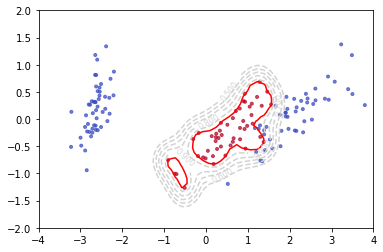

In [88]:
plt.scatter(*iris_X_2d.T, color=cm.coolwarm(iris_versicolor*255), s=9, alpha=0.7)
contours = plt.contour(X, Y, Z, [.5, .6, .7, .8, .9], colors='lightgray', linestyles='dashed')
decision = plt.contour(X, Y, Z, [best_cut], colors='red')
plt.clabel(contours, inline=True, fontsize=8)
plt.show()